# Main Problem
$$y'+\frac{3}{x}y=4x-3$$
$$y(1)=0$$

# Exact Solution:

$$y(x)=\frac{4}{5}x^2-\frac{3}{4}x-\frac{1}{20x^3}$$

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

In [ ]:
# The trial solution using the deep neural network:
def g_trial(x,params, g0 = 0):
    return g0 + (x-1)*neural_network(params,x)

In [ ]:
# The right side of the ODE:
def g(x, g_trial, gamma = 2):
    return -(3/x)*g_trial +4*x - 3

In [ ]:
# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    #d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

In [ ]:
# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]
        print('Final cost: %g'%cost_function(P, x))

    return P

In [ ]:
def g_analytic(x, gamma = 0, g0 = 0):
    return (4/5)*x**2 - (3/4)*x - (1/(20*x**3))

In [ ]:
# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(1, 2, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 20000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

Initial cost: 6.81699
Final cost: 6.10988
Final cost: 5.47768
Final cost: 4.91225
Final cost: 4.40638
Final cost: 3.95363
Final cost: 3.54829
Final cost: 3.1853
Final cost: 2.86012
Final cost: 2.56875
Final cost: 2.30759
Final cost: 2.07346
Final cost: 1.8635
Final cost: 1.67517
Final cost: 1.50622
Final cost: 1.3546
Final cost: 1.21853
Final cost: 1.09637
Final cost: 0.986686
Final cost: 0.888188
Final cost: 0.799718
Final cost: 0.720243
Final cost: 0.648838
Final cost: 0.584672
Final cost: 0.527005
Final cost: 0.475172
Final cost: 0.428575
Final cost: 0.386681
Final cost: 0.349012
Final cost: 0.315137
Final cost: 0.28467
Final cost: 0.257267
Final cost: 0.232617
Final cost: 0.210441
Final cost: 0.19049
Final cost: 0.172538
Final cost: 0.156384
Final cost: 0.141847
Final cost: 0.128764
Final cost: 0.116988
Final cost: 0.10639
Final cost: 0.0968492
Final cost: 0.0882609
Final cost: 0.0805293
Final cost: 0.0735685
Final cost: 0.0673014
Final cost: 0.0616586
Final cost: 0.0565776
Final c

Final cost: 0.0102195
Final cost: 0.0102187
Final cost: 0.010218
Final cost: 0.0102172
Final cost: 0.0102165
Final cost: 0.0102157
Final cost: 0.010215
Final cost: 0.0102142
Final cost: 0.0102135
Final cost: 0.0102127
Final cost: 0.0102119
Final cost: 0.0102112
Final cost: 0.0102104
Final cost: 0.0102097
Final cost: 0.0102089
Final cost: 0.0102082
Final cost: 0.0102074
Final cost: 0.0102067
Final cost: 0.0102059
Final cost: 0.0102052
Final cost: 0.0102045
Final cost: 0.0102037
Final cost: 0.010203
Final cost: 0.0102022
Final cost: 0.0102015
Final cost: 0.0102007
Final cost: 0.0102
Final cost: 0.0101992
Final cost: 0.0101985
Final cost: 0.0101977
Final cost: 0.010197
Final cost: 0.0101963
Final cost: 0.0101955
Final cost: 0.0101948
Final cost: 0.010194
Final cost: 0.0101933
Final cost: 0.0101926
Final cost: 0.0101918
Final cost: 0.0101911
Final cost: 0.0101903
Final cost: 0.0101896
Final cost: 0.0101889
Final cost: 0.0101881
Final cost: 0.0101874
Final cost: 0.0101867
Final cost: 0.0101

Final cost: 0.00995824
Final cost: 0.00995765
Final cost: 0.00995706
Final cost: 0.00995648
Final cost: 0.00995589
Final cost: 0.0099553
Final cost: 0.00995472
Final cost: 0.00995413
Final cost: 0.00995355
Final cost: 0.00995296
Final cost: 0.00995238
Final cost: 0.00995179
Final cost: 0.00995121
Final cost: 0.00995063
Final cost: 0.00995005
Final cost: 0.00994946
Final cost: 0.00994888
Final cost: 0.0099483
Final cost: 0.00994772
Final cost: 0.00994714
Final cost: 0.00994656
Final cost: 0.00994598
Final cost: 0.0099454
Final cost: 0.00994482
Final cost: 0.00994424
Final cost: 0.00994366
Final cost: 0.00994308
Final cost: 0.0099425
Final cost: 0.00994192
Final cost: 0.00994135
Final cost: 0.00994077
Final cost: 0.00994019
Final cost: 0.00993962
Final cost: 0.00993904
Final cost: 0.00993847
Final cost: 0.00993789
Final cost: 0.00993732
Final cost: 0.00993674
Final cost: 0.00993617
Final cost: 0.00993559
Final cost: 0.00993502
Final cost: 0.00993445
Final cost: 0.00993387
Final cost: 0.0

Final cost: 0.0097353
Final cost: 0.00973485
Final cost: 0.0097344
Final cost: 0.00973395
Final cost: 0.0097335
Final cost: 0.00973305
Final cost: 0.0097326
Final cost: 0.00973215
Final cost: 0.0097317
Final cost: 0.00973125
Final cost: 0.0097308
Final cost: 0.00973035
Final cost: 0.0097299
Final cost: 0.00972945
Final cost: 0.009729
Final cost: 0.00972855
Final cost: 0.00972811
Final cost: 0.00972766
Final cost: 0.00972721
Final cost: 0.00972677
Final cost: 0.00972632
Final cost: 0.00972587
Final cost: 0.00972543
Final cost: 0.00972498
Final cost: 0.00972453
Final cost: 0.00972409
Final cost: 0.00972364
Final cost: 0.0097232
Final cost: 0.00972275
Final cost: 0.00972231
Final cost: 0.00972186
Final cost: 0.00972142
Final cost: 0.00972098
Final cost: 0.00972053
Final cost: 0.00972009
Final cost: 0.00971965
Final cost: 0.0097192
Final cost: 0.00971876
Final cost: 0.00971832
Final cost: 0.00971788
Final cost: 0.00971744
Final cost: 0.009717
Final cost: 0.00971655
Final cost: 0.00971611
F

Final cost: 0.00957111
Final cost: 0.00957075
Final cost: 0.00957039
Final cost: 0.00957003
Final cost: 0.00956967
Final cost: 0.00956931
Final cost: 0.00956895
Final cost: 0.00956859
Final cost: 0.00956824
Final cost: 0.00956788
Final cost: 0.00956752
Final cost: 0.00956716
Final cost: 0.0095668
Final cost: 0.00956645
Final cost: 0.00956609
Final cost: 0.00956573
Final cost: 0.00956538
Final cost: 0.00956502
Final cost: 0.00956466
Final cost: 0.00956431
Final cost: 0.00956395
Final cost: 0.00956359
Final cost: 0.00956324
Final cost: 0.00956288
Final cost: 0.00956253
Final cost: 0.00956217
Final cost: 0.00956182
Final cost: 0.00956146
Final cost: 0.00956111
Final cost: 0.00956075
Final cost: 0.0095604
Final cost: 0.00956005
Final cost: 0.00955969
Final cost: 0.00955934
Final cost: 0.00955898
Final cost: 0.00955863
Final cost: 0.00955828
Final cost: 0.00955793
Final cost: 0.00955757
Final cost: 0.00955722
Final cost: 0.00955687
Final cost: 0.00955652
Final cost: 0.00955616
Final cost: 0

Final cost: 0.00942423
Final cost: 0.00942394
Final cost: 0.00942366
Final cost: 0.00942337
Final cost: 0.00942308
Final cost: 0.0094228
Final cost: 0.00942251
Final cost: 0.00942223
Final cost: 0.00942194
Final cost: 0.00942166
Final cost: 0.00942137
Final cost: 0.00942109
Final cost: 0.00942081
Final cost: 0.00942052
Final cost: 0.00942024
Final cost: 0.00941995
Final cost: 0.00941967
Final cost: 0.00941938
Final cost: 0.0094191
Final cost: 0.00941882
Final cost: 0.00941853
Final cost: 0.00941825
Final cost: 0.00941797
Final cost: 0.00941768
Final cost: 0.0094174
Final cost: 0.00941712
Final cost: 0.00941684
Final cost: 0.00941655
Final cost: 0.00941627
Final cost: 0.00941599
Final cost: 0.00941571
Final cost: 0.00941543
Final cost: 0.00941514
Final cost: 0.00941486
Final cost: 0.00941458
Final cost: 0.0094143
Final cost: 0.00941402
Final cost: 0.00941374
Final cost: 0.00941346
Final cost: 0.00941317
Final cost: 0.00941289
Final cost: 0.00941261
Final cost: 0.00941233
Final cost: 0.0

Final cost: 0.00931353
Final cost: 0.00931329
Final cost: 0.00931305
Final cost: 0.00931281
Final cost: 0.00931258
Final cost: 0.00931234
Final cost: 0.0093121
Final cost: 0.00931186
Final cost: 0.00931163
Final cost: 0.00931139
Final cost: 0.00931115
Final cost: 0.00931092
Final cost: 0.00931068
Final cost: 0.00931044
Final cost: 0.00931021
Final cost: 0.00930997
Final cost: 0.00930974
Final cost: 0.0093095
Final cost: 0.00930926
Final cost: 0.00930903
Final cost: 0.00930879
Final cost: 0.00930856
Final cost: 0.00930832
Final cost: 0.00930808
Final cost: 0.00930785
Final cost: 0.00930761
Final cost: 0.00930738
Final cost: 0.00930714
Final cost: 0.00930691
Final cost: 0.00930667
Final cost: 0.00930644
Final cost: 0.0093062
Final cost: 0.00930597
Final cost: 0.00930573
Final cost: 0.0093055
Final cost: 0.00930527
Final cost: 0.00930503
Final cost: 0.0093048
Final cost: 0.00930456
Final cost: 0.00930433
Final cost: 0.0093041
Final cost: 0.00930386
Final cost: 0.00930363
Final cost: 0.009

Final cost: 0.00921746
Final cost: 0.00921726
Final cost: 0.00921706
Final cost: 0.00921686
Final cost: 0.00921665
Final cost: 0.00921645
Final cost: 0.00921625
Final cost: 0.00921605
Final cost: 0.00921585
Final cost: 0.00921565
Final cost: 0.00921545
Final cost: 0.00921524
Final cost: 0.00921504
Final cost: 0.00921484
Final cost: 0.00921464
Final cost: 0.00921444
Final cost: 0.00921424
Final cost: 0.00921404
Final cost: 0.00921384
Final cost: 0.00921364
Final cost: 0.00921344
Final cost: 0.00921323
Final cost: 0.00921303
Final cost: 0.00921283
Final cost: 0.00921263
Final cost: 0.00921243
Final cost: 0.00921223
Final cost: 0.00921203
Final cost: 0.00921183
Final cost: 0.00921163
Final cost: 0.00921143
Final cost: 0.00921123
Final cost: 0.00921103
Final cost: 0.00921083
Final cost: 0.00921063
Final cost: 0.00921043
Final cost: 0.00921023
Final cost: 0.00921003
Final cost: 0.00920983
Final cost: 0.00920963
Final cost: 0.00920943
Final cost: 0.00920924
Final cost: 0.00920904
Final cost:

Final cost: 0.00912918
Final cost: 0.009129
Final cost: 0.00912883
Final cost: 0.00912865
Final cost: 0.00912848
Final cost: 0.0091283
Final cost: 0.00912813
Final cost: 0.00912795
Final cost: 0.00912778
Final cost: 0.0091276
Final cost: 0.00912743
Final cost: 0.00912725
Final cost: 0.00912708
Final cost: 0.0091269
Final cost: 0.00912673
Final cost: 0.00912656
Final cost: 0.00912638
Final cost: 0.00912621
Final cost: 0.00912603
Final cost: 0.00912586
Final cost: 0.00912568
Final cost: 0.00912551
Final cost: 0.00912533
Final cost: 0.00912516
Final cost: 0.00912499
Final cost: 0.00912481
Final cost: 0.00912464
Final cost: 0.00912446
Final cost: 0.00912429
Final cost: 0.00912412
Final cost: 0.00912394
Final cost: 0.00912377
Final cost: 0.00912359
Final cost: 0.00912342
Final cost: 0.00912325
Final cost: 0.00912307
Final cost: 0.0091229
Final cost: 0.00912273
Final cost: 0.00912255
Final cost: 0.00912238
Final cost: 0.00912221
Final cost: 0.00912203
Final cost: 0.00912186
Final cost: 0.009

Final cost: 0.00906044
Final cost: 0.00906028
Final cost: 0.00906012
Final cost: 0.00905996
Final cost: 0.00905981
Final cost: 0.00905965
Final cost: 0.00905949
Final cost: 0.00905933
Final cost: 0.00905917
Final cost: 0.00905901
Final cost: 0.00905886
Final cost: 0.0090587
Final cost: 0.00905854
Final cost: 0.00905838
Final cost: 0.00905822
Final cost: 0.00905807
Final cost: 0.00905791
Final cost: 0.00905775
Final cost: 0.00905759
Final cost: 0.00905743
Final cost: 0.00905728
Final cost: 0.00905712
Final cost: 0.00905696
Final cost: 0.0090568
Final cost: 0.00905665
Final cost: 0.00905649
Final cost: 0.00905633
Final cost: 0.00905617
Final cost: 0.00905601
Final cost: 0.00905586
Final cost: 0.0090557
Final cost: 0.00905554
Final cost: 0.00905539
Final cost: 0.00905523
Final cost: 0.00905507
Final cost: 0.00905491
Final cost: 0.00905476
Final cost: 0.0090546
Final cost: 0.00905444
Final cost: 0.00905428
Final cost: 0.00905413
Final cost: 0.00905397
Final cost: 0.00905381
Final cost: 0.0

Final cost: 0.0089994
Final cost: 0.00899926
Final cost: 0.00899911
Final cost: 0.00899896
Final cost: 0.00899882
Final cost: 0.00899867
Final cost: 0.00899853
Final cost: 0.00899838
Final cost: 0.00899823
Final cost: 0.00899809
Final cost: 0.00899794
Final cost: 0.00899779
Final cost: 0.00899765
Final cost: 0.0089975
Final cost: 0.00899736
Final cost: 0.00899721
Final cost: 0.00899706
Final cost: 0.00899692
Final cost: 0.00899677
Final cost: 0.00899662
Final cost: 0.00899648
Final cost: 0.00899633
Final cost: 0.00899619
Final cost: 0.00899604
Final cost: 0.00899589
Final cost: 0.00899575
Final cost: 0.0089956
Final cost: 0.00899546
Final cost: 0.00899531
Final cost: 0.00899517
Final cost: 0.00899502
Final cost: 0.00899487
Final cost: 0.00899473
Final cost: 0.00899458
Final cost: 0.00899444
Final cost: 0.00899429
Final cost: 0.00899415
Final cost: 0.008994
Final cost: 0.00899385
Final cost: 0.00899371
Final cost: 0.00899356
Final cost: 0.00899342
Final cost: 0.00899327
Final cost: 0.00

Final cost: 0.00893336
Final cost: 0.00893322
Final cost: 0.00893309
Final cost: 0.00893295
Final cost: 0.00893281
Final cost: 0.00893268
Final cost: 0.00893254
Final cost: 0.00893241
Final cost: 0.00893227
Final cost: 0.00893213
Final cost: 0.008932
Final cost: 0.00893186
Final cost: 0.00893173
Final cost: 0.00893159
Final cost: 0.00893145
Final cost: 0.00893132
Final cost: 0.00893118
Final cost: 0.00893105
Final cost: 0.00893091
Final cost: 0.00893077
Final cost: 0.00893064
Final cost: 0.0089305
Final cost: 0.00893037
Final cost: 0.00893023
Final cost: 0.00893009
Final cost: 0.00892996
Final cost: 0.00892982
Final cost: 0.00892969
Final cost: 0.00892955
Final cost: 0.00892941
Final cost: 0.00892928
Final cost: 0.00892914
Final cost: 0.00892901
Final cost: 0.00892887
Final cost: 0.00892874
Final cost: 0.0089286
Final cost: 0.00892846
Final cost: 0.00892833
Final cost: 0.00892819
Final cost: 0.00892806
Final cost: 0.00892792
Final cost: 0.00892779
Final cost: 0.00892765
Final cost: 0.0

Final cost: 0.00887281
Final cost: 0.00887268
Final cost: 0.00887255
Final cost: 0.00887242
Final cost: 0.0088723
Final cost: 0.00887217
Final cost: 0.00887204
Final cost: 0.00887191
Final cost: 0.00887178
Final cost: 0.00887165
Final cost: 0.00887152
Final cost: 0.00887139
Final cost: 0.00887126
Final cost: 0.00887113
Final cost: 0.00887101
Final cost: 0.00887088
Final cost: 0.00887075
Final cost: 0.00887062
Final cost: 0.00887049
Final cost: 0.00887036
Final cost: 0.00887023
Final cost: 0.0088701
Final cost: 0.00886998
Final cost: 0.00886985
Final cost: 0.00886972
Final cost: 0.00886959
Final cost: 0.00886946
Final cost: 0.00886933
Final cost: 0.0088692
Final cost: 0.00886907
Final cost: 0.00886895
Final cost: 0.00886882
Final cost: 0.00886869
Final cost: 0.00886856
Final cost: 0.00886843
Final cost: 0.0088683
Final cost: 0.00886817
Final cost: 0.00886805
Final cost: 0.00886792
Final cost: 0.00886779
Final cost: 0.00886766
Final cost: 0.00886753
Final cost: 0.0088674
Final cost: 0.00

Final cost: 0.00882729
Final cost: 0.00882717
Final cost: 0.00882704
Final cost: 0.00882692
Final cost: 0.00882679
Final cost: 0.00882667
Final cost: 0.00882654
Final cost: 0.00882642
Final cost: 0.00882629
Final cost: 0.00882617
Final cost: 0.00882604
Final cost: 0.00882592
Final cost: 0.00882579
Final cost: 0.00882567
Final cost: 0.00882555
Final cost: 0.00882542
Final cost: 0.0088253
Final cost: 0.00882517
Final cost: 0.00882505
Final cost: 0.00882492
Final cost: 0.0088248
Final cost: 0.00882467
Final cost: 0.00882455
Final cost: 0.00882443
Final cost: 0.0088243
Final cost: 0.00882418
Final cost: 0.00882405
Final cost: 0.00882393
Final cost: 0.0088238
Final cost: 0.00882368
Final cost: 0.00882355
Final cost: 0.00882343
Final cost: 0.00882331
Final cost: 0.00882318
Final cost: 0.00882306
Final cost: 0.00882293
Final cost: 0.00882281
Final cost: 0.00882268
Final cost: 0.00882256
Final cost: 0.00882244
Final cost: 0.00882231
Final cost: 0.00882219
Final cost: 0.00882206
Final cost: 0.0

Final cost: 0.00878075
Final cost: 0.00878063
Final cost: 0.00878051
Final cost: 0.00878039
Final cost: 0.00878027
Final cost: 0.00878014
Final cost: 0.00878002
Final cost: 0.0087799
Final cost: 0.00877978
Final cost: 0.00877966
Final cost: 0.00877954
Final cost: 0.00877942
Final cost: 0.0087793
Final cost: 0.00877918
Final cost: 0.00877906
Final cost: 0.00877893
Final cost: 0.00877881
Final cost: 0.00877869
Final cost: 0.00877857
Final cost: 0.00877845
Final cost: 0.00877833
Final cost: 0.00877821
Final cost: 0.00877809
Final cost: 0.00877797
Final cost: 0.00877785
Final cost: 0.00877773
Final cost: 0.00877761
Final cost: 0.00877748
Final cost: 0.00877736
Final cost: 0.00877724
Final cost: 0.00877712
Final cost: 0.008777
Final cost: 0.00877688
Final cost: 0.00877676
Final cost: 0.00877664
Final cost: 0.00877652
Final cost: 0.0087764
Final cost: 0.00877628
Final cost: 0.00877616
Final cost: 0.00877604
Final cost: 0.00877591
Final cost: 0.00877579
Final cost: 0.00877567
Final cost: 0.00

Final cost: 0.00872733
Final cost: 0.00872722
Final cost: 0.0087271
Final cost: 0.00872698
Final cost: 0.00872686
Final cost: 0.00872675
Final cost: 0.00872663
Final cost: 0.00872651
Final cost: 0.00872639
Final cost: 0.00872628
Final cost: 0.00872616
Final cost: 0.00872604
Final cost: 0.00872592
Final cost: 0.00872581
Final cost: 0.00872569
Final cost: 0.00872557
Final cost: 0.00872545
Final cost: 0.00872534
Final cost: 0.00872522
Final cost: 0.0087251
Final cost: 0.00872498
Final cost: 0.00872487
Final cost: 0.00872475
Final cost: 0.00872463
Final cost: 0.00872451
Final cost: 0.0087244
Final cost: 0.00872428
Final cost: 0.00872416
Final cost: 0.00872404
Final cost: 0.00872393
Final cost: 0.00872381
Final cost: 0.00872369
Final cost: 0.00872357
Final cost: 0.00872346
Final cost: 0.00872334
Final cost: 0.00872322
Final cost: 0.00872311
Final cost: 0.00872299
Final cost: 0.00872287
Final cost: 0.00872275
Final cost: 0.00872264
Final cost: 0.00872252
Final cost: 0.0087224
Final cost: 0.0

Final cost: 0.00868163
Final cost: 0.00868151
Final cost: 0.0086814
Final cost: 0.00868128
Final cost: 0.00868117
Final cost: 0.00868105
Final cost: 0.00868094
Final cost: 0.00868082
Final cost: 0.00868071
Final cost: 0.00868059
Final cost: 0.00868048
Final cost: 0.00868036
Final cost: 0.00868025
Final cost: 0.00868013
Final cost: 0.00868002
Final cost: 0.0086799
Final cost: 0.00867979
Final cost: 0.00867967
Final cost: 0.00867956
Final cost: 0.00867944
Final cost: 0.00867933
Final cost: 0.00867921
Final cost: 0.0086791
Final cost: 0.00867898
Final cost: 0.00867887
Final cost: 0.00867875
Final cost: 0.00867864
Final cost: 0.00867852
Final cost: 0.00867841
Final cost: 0.00867829
Final cost: 0.00867818
Final cost: 0.00867806
Final cost: 0.00867795
Final cost: 0.00867783
Final cost: 0.00867772
Final cost: 0.0086776
Final cost: 0.00867749
Final cost: 0.00867737
Final cost: 0.00867726
Final cost: 0.00867714
Final cost: 0.00867703
Final cost: 0.00867691
Final cost: 0.0086768
Final cost: 0.00

Final cost: 0.00863829
Final cost: 0.00863817
Final cost: 0.00863806
Final cost: 0.00863795
Final cost: 0.00863783
Final cost: 0.00863772
Final cost: 0.00863761
Final cost: 0.0086375
Final cost: 0.00863738
Final cost: 0.00863727
Final cost: 0.00863716
Final cost: 0.00863704
Final cost: 0.00863693
Final cost: 0.00863682
Final cost: 0.0086367
Final cost: 0.00863659
Final cost: 0.00863648
Final cost: 0.00863637
Final cost: 0.00863625
Final cost: 0.00863614
Final cost: 0.00863603
Final cost: 0.00863591
Final cost: 0.0086358
Final cost: 0.00863569
Final cost: 0.00863557
Final cost: 0.00863546
Final cost: 0.00863535
Final cost: 0.00863524
Final cost: 0.00863512
Final cost: 0.00863501
Final cost: 0.0086349
Final cost: 0.00863478
Final cost: 0.00863467
Final cost: 0.00863456
Final cost: 0.00863445
Final cost: 0.00863433
Final cost: 0.00863422
Final cost: 0.00863411
Final cost: 0.00863399
Final cost: 0.00863388
Final cost: 0.00863377
Final cost: 0.00863366
Final cost: 0.00863354
Final cost: 0.0

Final cost: 0.00859188
Final cost: 0.00859177
Final cost: 0.00859166
Final cost: 0.00859155
Final cost: 0.00859144
Final cost: 0.00859133
Final cost: 0.00859122
Final cost: 0.0085911
Final cost: 0.00859099
Final cost: 0.00859088
Final cost: 0.00859077
Final cost: 0.00859066
Final cost: 0.00859055
Final cost: 0.00859044
Final cost: 0.00859033
Final cost: 0.00859022
Final cost: 0.0085901
Final cost: 0.00858999
Final cost: 0.00858988
Final cost: 0.00858977
Final cost: 0.00858966
Final cost: 0.00858955
Final cost: 0.00858944
Final cost: 0.00858933
Final cost: 0.00858922
Final cost: 0.0085891
Final cost: 0.00858899
Final cost: 0.00858888
Final cost: 0.00858877
Final cost: 0.00858866
Final cost: 0.00858855
Final cost: 0.00858844
Final cost: 0.00858833
Final cost: 0.00858822
Final cost: 0.00858811
Final cost: 0.00858799
Final cost: 0.00858788
Final cost: 0.00858777
Final cost: 0.00858766
Final cost: 0.00858755
Final cost: 0.00858744
Final cost: 0.00858733
Final cost: 0.00858722
Final cost: 0.

Final cost: 0.00854469
Final cost: 0.00854458
Final cost: 0.00854447
Final cost: 0.00854436
Final cost: 0.00854425
Final cost: 0.00854414
Final cost: 0.00854403
Final cost: 0.00854392
Final cost: 0.00854381
Final cost: 0.0085437
Final cost: 0.00854359
Final cost: 0.00854349
Final cost: 0.00854338
Final cost: 0.00854327
Final cost: 0.00854316
Final cost: 0.00854305
Final cost: 0.00854294
Final cost: 0.00854283
Final cost: 0.00854272
Final cost: 0.00854261
Final cost: 0.0085425
Final cost: 0.00854239
Final cost: 0.00854228
Final cost: 0.00854217
Final cost: 0.00854206
Final cost: 0.00854195
Final cost: 0.00854185
Final cost: 0.00854174
Final cost: 0.00854163
Final cost: 0.00854152
Final cost: 0.00854141
Final cost: 0.0085413
Final cost: 0.00854119
Final cost: 0.00854108
Final cost: 0.00854097
Final cost: 0.00854086
Final cost: 0.00854075
Final cost: 0.00854064
Final cost: 0.00854053
Final cost: 0.00854042
Final cost: 0.00854032
Final cost: 0.00854021
Final cost: 0.0085401
Final cost: 0.0

Final cost: 0.00849637
Final cost: 0.00849626
Final cost: 0.00849616
Final cost: 0.00849605
Final cost: 0.00849594
Final cost: 0.00849583
Final cost: 0.00849572
Final cost: 0.00849562
Final cost: 0.00849551
Final cost: 0.0084954
Final cost: 0.00849529
Final cost: 0.00849519
Final cost: 0.00849508
Final cost: 0.00849497
Final cost: 0.00849486
Final cost: 0.00849475
Final cost: 0.00849465
Final cost: 0.00849454
Final cost: 0.00849443
Final cost: 0.00849432
Final cost: 0.00849422
Final cost: 0.00849411
Final cost: 0.008494
Final cost: 0.00849389
Final cost: 0.00849379
Final cost: 0.00849368
Final cost: 0.00849357
Final cost: 0.00849346
Final cost: 0.00849335
Final cost: 0.00849325
Final cost: 0.00849314
Final cost: 0.00849303
Final cost: 0.00849292
Final cost: 0.00849282
Final cost: 0.00849271
Final cost: 0.0084926
Final cost: 0.00849249
Final cost: 0.00849239
Final cost: 0.00849228
Final cost: 0.00849217
Final cost: 0.00849206
Final cost: 0.00849196
Final cost: 0.00849185
Final cost: 0.0

Final cost: 0.00845109
Final cost: 0.00845098
Final cost: 0.00845087
Final cost: 0.00845077
Final cost: 0.00845066
Final cost: 0.00845056
Final cost: 0.00845045
Final cost: 0.00845034
Final cost: 0.00845024
Final cost: 0.00845013
Final cost: 0.00845002
Final cost: 0.00844992
Final cost: 0.00844981
Final cost: 0.00844971
Final cost: 0.0084496
Final cost: 0.00844949
Final cost: 0.00844939
Final cost: 0.00844928
Final cost: 0.00844917
Final cost: 0.00844907
Final cost: 0.00844896
Final cost: 0.00844885
Final cost: 0.00844875
Final cost: 0.00844864
Final cost: 0.00844854
Final cost: 0.00844843
Final cost: 0.00844832
Final cost: 0.00844822
Final cost: 0.00844811
Final cost: 0.008448
Final cost: 0.0084479
Final cost: 0.00844779
Final cost: 0.00844769
Final cost: 0.00844758
Final cost: 0.00844747
Final cost: 0.00844737
Final cost: 0.00844726
Final cost: 0.00844715
Final cost: 0.00844705
Final cost: 0.00844694
Final cost: 0.00844684
Final cost: 0.00844673
Final cost: 0.00844662
Final cost: 0.0

Final cost: 0.0084025
Final cost: 0.0084024
Final cost: 0.00840229
Final cost: 0.00840219
Final cost: 0.00840209
Final cost: 0.00840198
Final cost: 0.00840188
Final cost: 0.00840177
Final cost: 0.00840167
Final cost: 0.00840156
Final cost: 0.00840146
Final cost: 0.00840135
Final cost: 0.00840125
Final cost: 0.00840114
Final cost: 0.00840104
Final cost: 0.00840093
Final cost: 0.00840083
Final cost: 0.00840072
Final cost: 0.00840062
Final cost: 0.00840051
Final cost: 0.00840041
Final cost: 0.0084003
Final cost: 0.0084002
Final cost: 0.00840009
Final cost: 0.00839999
Final cost: 0.00839988
Final cost: 0.00839978
Final cost: 0.00839967
Final cost: 0.00839957
Final cost: 0.00839946
Final cost: 0.00839936
Final cost: 0.00839925
Final cost: 0.00839915
Final cost: 0.00839904
Final cost: 0.00839894
Final cost: 0.00839884
Final cost: 0.00839873
Final cost: 0.00839863
Final cost: 0.00839852
Final cost: 0.00839842
Final cost: 0.00839831
Final cost: 0.00839821
Final cost: 0.0083981
Final cost: 0.00

Final cost: 0.00836473
Final cost: 0.00836463
Final cost: 0.00836452
Final cost: 0.00836442
Final cost: 0.00836432
Final cost: 0.00836421
Final cost: 0.00836411
Final cost: 0.008364
Final cost: 0.0083639
Final cost: 0.0083638
Final cost: 0.00836369
Final cost: 0.00836359
Final cost: 0.00836348
Final cost: 0.00836338
Final cost: 0.00836328
Final cost: 0.00836317
Final cost: 0.00836307
Final cost: 0.00836297
Final cost: 0.00836286
Final cost: 0.00836276
Final cost: 0.00836265
Final cost: 0.00836255
Final cost: 0.00836245
Final cost: 0.00836234
Final cost: 0.00836224
Final cost: 0.00836214
Final cost: 0.00836203
Final cost: 0.00836193
Final cost: 0.00836182
Final cost: 0.00836172
Final cost: 0.00836162
Final cost: 0.00836151
Final cost: 0.00836141
Final cost: 0.00836131
Final cost: 0.0083612
Final cost: 0.0083611
Final cost: 0.008361
Final cost: 0.00836089
Final cost: 0.00836079
Final cost: 0.00836068
Final cost: 0.00836058
Final cost: 0.00836048
Final cost: 0.00836037
Final cost: 0.00836

Final cost: 0.00832282
Final cost: 0.00832272
Final cost: 0.00832262
Final cost: 0.00832252
Final cost: 0.00832241
Final cost: 0.00832231
Final cost: 0.00832221
Final cost: 0.00832211
Final cost: 0.008322
Final cost: 0.0083219
Final cost: 0.0083218
Final cost: 0.0083217
Final cost: 0.00832159
Final cost: 0.00832149
Final cost: 0.00832139
Final cost: 0.00832129
Final cost: 0.00832118
Final cost: 0.00832108
Final cost: 0.00832098
Final cost: 0.00832087
Final cost: 0.00832077
Final cost: 0.00832067
Final cost: 0.00832057
Final cost: 0.00832046
Final cost: 0.00832036
Final cost: 0.00832026
Final cost: 0.00832016
Final cost: 0.00832005
Final cost: 0.00831995
Final cost: 0.00831985
Final cost: 0.00831975
Final cost: 0.00831964
Final cost: 0.00831954
Final cost: 0.00831944
Final cost: 0.00831934
Final cost: 0.00831923
Final cost: 0.00831913
Final cost: 0.00831903
Final cost: 0.00831893
Final cost: 0.00831882
Final cost: 0.00831872
Final cost: 0.00831862
Final cost: 0.00831852
Final cost: 0.00

Final cost: 0.00828129
Final cost: 0.00828118
Final cost: 0.00828108
Final cost: 0.00828098
Final cost: 0.00828088
Final cost: 0.00828078
Final cost: 0.00828068
Final cost: 0.00828058
Final cost: 0.00828047
Final cost: 0.00828037
Final cost: 0.00828027
Final cost: 0.00828017
Final cost: 0.00828007
Final cost: 0.00827997
Final cost: 0.00827987
Final cost: 0.00827976
Final cost: 0.00827966
Final cost: 0.00827956
Final cost: 0.00827946
Final cost: 0.00827936
Final cost: 0.00827926
Final cost: 0.00827916
Final cost: 0.00827905
Final cost: 0.00827895
Final cost: 0.00827885
Final cost: 0.00827875
Final cost: 0.00827865
Final cost: 0.00827855
Final cost: 0.00827845
Final cost: 0.00827834
Final cost: 0.00827824
Final cost: 0.00827814
Final cost: 0.00827804
Final cost: 0.00827794
Final cost: 0.00827784
Final cost: 0.00827774
Final cost: 0.00827763
Final cost: 0.00827753
Final cost: 0.00827743
Final cost: 0.00827733
Final cost: 0.00827723
Final cost: 0.00827713
Final cost: 0.00827703
Final cost:

Final cost: 0.0082388
Final cost: 0.0082387
Final cost: 0.0082386
Final cost: 0.0082385
Final cost: 0.0082384
Final cost: 0.0082383
Final cost: 0.0082382
Final cost: 0.0082381
Final cost: 0.008238
Final cost: 0.0082379
Final cost: 0.0082378
Final cost: 0.0082377
Final cost: 0.0082376
Final cost: 0.0082375
Final cost: 0.00823739
Final cost: 0.00823729
Final cost: 0.00823719
Final cost: 0.00823709
Final cost: 0.00823699
Final cost: 0.00823689
Final cost: 0.00823679
Final cost: 0.00823669
Final cost: 0.00823659
Final cost: 0.00823649
Final cost: 0.00823639
Final cost: 0.00823629
Final cost: 0.00823619
Final cost: 0.00823609
Final cost: 0.00823599
Final cost: 0.00823589
Final cost: 0.00823579
Final cost: 0.00823569
Final cost: 0.00823559
Final cost: 0.00823549
Final cost: 0.00823539
Final cost: 0.00823529
Final cost: 0.00823519
Final cost: 0.00823509
Final cost: 0.00823499
Final cost: 0.00823489
Final cost: 0.00823479
Final cost: 0.00823469
Final cost: 0.00823459
Final cost: 0.00823449
Fin

Final cost: 0.00819391
Final cost: 0.00819381
Final cost: 0.00819371
Final cost: 0.00819362
Final cost: 0.00819352
Final cost: 0.00819342
Final cost: 0.00819332
Final cost: 0.00819322
Final cost: 0.00819312
Final cost: 0.00819302
Final cost: 0.00819292
Final cost: 0.00819282
Final cost: 0.00819272
Final cost: 0.00819262
Final cost: 0.00819252
Final cost: 0.00819243
Final cost: 0.00819233
Final cost: 0.00819223
Final cost: 0.00819213
Final cost: 0.00819203
Final cost: 0.00819193
Final cost: 0.00819183
Final cost: 0.00819173
Final cost: 0.00819163
Final cost: 0.00819153
Final cost: 0.00819143
Final cost: 0.00819134
Final cost: 0.00819124
Final cost: 0.00819114
Final cost: 0.00819104
Final cost: 0.00819094
Final cost: 0.00819084
Final cost: 0.00819074
Final cost: 0.00819064
Final cost: 0.00819054
Final cost: 0.00819044
Final cost: 0.00819034
Final cost: 0.00819025
Final cost: 0.00819015
Final cost: 0.00819005
Final cost: 0.00818995
Final cost: 0.00818985
Final cost: 0.00818975
Final cost:

Final cost: 0.00815328
Final cost: 0.00815318
Final cost: 0.00815309
Final cost: 0.00815299
Final cost: 0.00815289
Final cost: 0.00815279
Final cost: 0.00815269
Final cost: 0.0081526
Final cost: 0.0081525
Final cost: 0.0081524
Final cost: 0.0081523
Final cost: 0.0081522
Final cost: 0.00815211
Final cost: 0.00815201
Final cost: 0.00815191
Final cost: 0.00815181
Final cost: 0.00815171
Final cost: 0.00815162
Final cost: 0.00815152
Final cost: 0.00815142
Final cost: 0.00815132
Final cost: 0.00815122
Final cost: 0.00815113
Final cost: 0.00815103
Final cost: 0.00815093
Final cost: 0.00815083
Final cost: 0.00815073
Final cost: 0.00815064
Final cost: 0.00815054
Final cost: 0.00815044
Final cost: 0.00815034
Final cost: 0.00815024
Final cost: 0.00815015
Final cost: 0.00815005
Final cost: 0.00814995
Final cost: 0.00814985
Final cost: 0.00814975
Final cost: 0.00814966
Final cost: 0.00814956
Final cost: 0.00814946
Final cost: 0.00814936
Final cost: 0.00814926
Final cost: 0.00814917
Final cost: 0.00

Final cost: 0.00811707
Final cost: 0.00811697
Final cost: 0.00811688
Final cost: 0.00811678
Final cost: 0.00811668
Final cost: 0.00811658
Final cost: 0.00811649
Final cost: 0.00811639
Final cost: 0.00811629
Final cost: 0.0081162
Final cost: 0.0081161
Final cost: 0.008116
Final cost: 0.0081159
Final cost: 0.00811581
Final cost: 0.00811571
Final cost: 0.00811561
Final cost: 0.00811552
Final cost: 0.00811542
Final cost: 0.00811532
Final cost: 0.00811522
Final cost: 0.00811513
Final cost: 0.00811503
Final cost: 0.00811493
Final cost: 0.00811484
Final cost: 0.00811474
Final cost: 0.00811464
Final cost: 0.00811454
Final cost: 0.00811445
Final cost: 0.00811435
Final cost: 0.00811425
Final cost: 0.00811416
Final cost: 0.00811406
Final cost: 0.00811396
Final cost: 0.00811387
Final cost: 0.00811377
Final cost: 0.00811367
Final cost: 0.00811357
Final cost: 0.00811348
Final cost: 0.00811338
Final cost: 0.00811328
Final cost: 0.00811319
Final cost: 0.00811309
Final cost: 0.00811299
Final cost: 0.00

Final cost: 0.00807678
Final cost: 0.00807669
Final cost: 0.00807659
Final cost: 0.00807649
Final cost: 0.0080764
Final cost: 0.0080763
Final cost: 0.0080762
Final cost: 0.00807611
Final cost: 0.00807601
Final cost: 0.00807592
Final cost: 0.00807582
Final cost: 0.00807572
Final cost: 0.00807563
Final cost: 0.00807553
Final cost: 0.00807544
Final cost: 0.00807534
Final cost: 0.00807524
Final cost: 0.00807515
Final cost: 0.00807505
Final cost: 0.00807496
Final cost: 0.00807486
Final cost: 0.00807476
Final cost: 0.00807467
Final cost: 0.00807457
Final cost: 0.00807448
Final cost: 0.00807438
Final cost: 0.00807428
Final cost: 0.00807419
Final cost: 0.00807409
Final cost: 0.008074
Final cost: 0.0080739
Final cost: 0.0080738
Final cost: 0.00807371
Final cost: 0.00807361
Final cost: 0.00807352
Final cost: 0.00807342
Final cost: 0.00807332
Final cost: 0.00807323
Final cost: 0.00807313
Final cost: 0.00807304
Final cost: 0.00807294
Final cost: 0.00807284
Final cost: 0.00807275
Final cost: 0.0080

Final cost: 0.00804035
Final cost: 0.00804025
Final cost: 0.00804016
Final cost: 0.00804006
Final cost: 0.00803997
Final cost: 0.00803987
Final cost: 0.00803978
Final cost: 0.00803968
Final cost: 0.00803959
Final cost: 0.00803949
Final cost: 0.0080394
Final cost: 0.0080393
Final cost: 0.00803921
Final cost: 0.00803911
Final cost: 0.00803902
Final cost: 0.00803892
Final cost: 0.00803883
Final cost: 0.00803873
Final cost: 0.00803864
Final cost: 0.00803854
Final cost: 0.00803845
Final cost: 0.00803835
Final cost: 0.00803826
Final cost: 0.00803816
Final cost: 0.00803807
Final cost: 0.00803797
Final cost: 0.00803788
Final cost: 0.00803778
Final cost: 0.00803769
Final cost: 0.00803759
Final cost: 0.0080375
Final cost: 0.0080374
Final cost: 0.00803731
Final cost: 0.00803721
Final cost: 0.00803712
Final cost: 0.00803702
Final cost: 0.00803693
Final cost: 0.00803683
Final cost: 0.00803673
Final cost: 0.00803664
Final cost: 0.00803654
Final cost: 0.00803645
Final cost: 0.00803635
Final cost: 0.0

Final cost: 0.00800248
Final cost: 0.00800239
Final cost: 0.00800229
Final cost: 0.0080022
Final cost: 0.00800211
Final cost: 0.00800201
Final cost: 0.00800192
Final cost: 0.00800182
Final cost: 0.00800173
Final cost: 0.00800163
Final cost: 0.00800154
Final cost: 0.00800145
Final cost: 0.00800135
Final cost: 0.00800126
Final cost: 0.00800116
Final cost: 0.00800107
Final cost: 0.00800098
Final cost: 0.00800088
Final cost: 0.00800079
Final cost: 0.00800069
Final cost: 0.0080006
Final cost: 0.0080005
Final cost: 0.00800041
Final cost: 0.00800032
Final cost: 0.00800022
Final cost: 0.00800013
Final cost: 0.00800003
Final cost: 0.00799994
Final cost: 0.00799985
Final cost: 0.00799975
Final cost: 0.00799966
Final cost: 0.00799956
Final cost: 0.00799947
Final cost: 0.00799938
Final cost: 0.00799928
Final cost: 0.00799919
Final cost: 0.00799909
Final cost: 0.007999
Final cost: 0.00799891
Final cost: 0.00799881
Final cost: 0.00799872
Final cost: 0.00799862
Final cost: 0.00799853
Final cost: 0.00

Final cost: 0.00796892
Final cost: 0.00796883
Final cost: 0.00796873
Final cost: 0.00796864
Final cost: 0.00796855
Final cost: 0.00796845
Final cost: 0.00796836
Final cost: 0.00796827
Final cost: 0.00796817
Final cost: 0.00796808
Final cost: 0.00796799
Final cost: 0.00796789
Final cost: 0.0079678
Final cost: 0.00796771
Final cost: 0.00796761
Final cost: 0.00796752
Final cost: 0.00796743
Final cost: 0.00796733
Final cost: 0.00796724
Final cost: 0.00796715
Final cost: 0.00796705
Final cost: 0.00796696
Final cost: 0.00796687
Final cost: 0.00796677
Final cost: 0.00796668
Final cost: 0.00796659
Final cost: 0.00796649
Final cost: 0.0079664
Final cost: 0.00796631
Final cost: 0.00796621
Final cost: 0.00796612
Final cost: 0.00796603
Final cost: 0.00796593
Final cost: 0.00796584
Final cost: 0.00796575
Final cost: 0.00796565
Final cost: 0.00796556
Final cost: 0.00796547
Final cost: 0.00796537
Final cost: 0.00796528
Final cost: 0.00796519
Final cost: 0.00796509
Final cost: 0.007965
Final cost: 0.0

Final cost: 0.00793159
Final cost: 0.0079315
Final cost: 0.00793141
Final cost: 0.00793132
Final cost: 0.00793122
Final cost: 0.00793113
Final cost: 0.00793104
Final cost: 0.00793095
Final cost: 0.00793085
Final cost: 0.00793076
Final cost: 0.00793067
Final cost: 0.00793058
Final cost: 0.00793048
Final cost: 0.00793039
Final cost: 0.0079303
Final cost: 0.00793021
Final cost: 0.00793012
Final cost: 0.00793002
Final cost: 0.00792993
Final cost: 0.00792984
Final cost: 0.00792975
Final cost: 0.00792965
Final cost: 0.00792956
Final cost: 0.00792947
Final cost: 0.00792938
Final cost: 0.00792928
Final cost: 0.00792919
Final cost: 0.0079291
Final cost: 0.00792901
Final cost: 0.00792892
Final cost: 0.00792882
Final cost: 0.00792873
Final cost: 0.00792864
Final cost: 0.00792855
Final cost: 0.00792845
Final cost: 0.00792836
Final cost: 0.00792827
Final cost: 0.00792818
Final cost: 0.00792808
Final cost: 0.00792799
Final cost: 0.0079279
Final cost: 0.00792781
Final cost: 0.00792772
Final cost: 0.0

Final cost: 0.00789163
Final cost: 0.00789154
Final cost: 0.00789145
Final cost: 0.00789136
Final cost: 0.00789126
Final cost: 0.00789117
Final cost: 0.00789108
Final cost: 0.00789099
Final cost: 0.0078909
Final cost: 0.00789081
Final cost: 0.00789072
Final cost: 0.00789063
Final cost: 0.00789053
Final cost: 0.00789044
Final cost: 0.00789035
Final cost: 0.00789026
Final cost: 0.00789017
Final cost: 0.00789008
Final cost: 0.00788999
Final cost: 0.00788989
Final cost: 0.0078898
Final cost: 0.00788971
Final cost: 0.00788962
Final cost: 0.00788953
Final cost: 0.00788944
Final cost: 0.00788935
Final cost: 0.00788926
Final cost: 0.00788916
Final cost: 0.00788907
Final cost: 0.00788898
Final cost: 0.00788889
Final cost: 0.0078888
Final cost: 0.00788871
Final cost: 0.00788862
Final cost: 0.00788853
Final cost: 0.00788843
Final cost: 0.00788834
Final cost: 0.00788825
Final cost: 0.00788816
Final cost: 0.00788807
Final cost: 0.00788798
Final cost: 0.00788789
Final cost: 0.00788779
Final cost: 0.

Final cost: 0.00785427
Final cost: 0.00785418
Final cost: 0.00785409
Final cost: 0.007854
Final cost: 0.00785391
Final cost: 0.00785382
Final cost: 0.00785373
Final cost: 0.00785364
Final cost: 0.00785355
Final cost: 0.00785346
Final cost: 0.00785337
Final cost: 0.00785328
Final cost: 0.00785319
Final cost: 0.0078531
Final cost: 0.00785301
Final cost: 0.00785292
Final cost: 0.00785283
Final cost: 0.00785274
Final cost: 0.00785265
Final cost: 0.00785256
Final cost: 0.00785247
Final cost: 0.00785237
Final cost: 0.00785228
Final cost: 0.00785219
Final cost: 0.0078521
Final cost: 0.00785201
Final cost: 0.00785192
Final cost: 0.00785183
Final cost: 0.00785174
Final cost: 0.00785165
Final cost: 0.00785156
Final cost: 0.00785147
Final cost: 0.00785138
Final cost: 0.00785129
Final cost: 0.0078512
Final cost: 0.00785111
Final cost: 0.00785102
Final cost: 0.00785093
Final cost: 0.00785084
Final cost: 0.00785075
Final cost: 0.00785066
Final cost: 0.00785057
Final cost: 0.00785048
Final cost: 0.00

Final cost: 0.0078122
Final cost: 0.00781211
Final cost: 0.00781202
Final cost: 0.00781193
Final cost: 0.00781185
Final cost: 0.00781176
Final cost: 0.00781167
Final cost: 0.00781158
Final cost: 0.00781149
Final cost: 0.0078114
Final cost: 0.00781131
Final cost: 0.00781122
Final cost: 0.00781113
Final cost: 0.00781104
Final cost: 0.00781095
Final cost: 0.00781086
Final cost: 0.00781077
Final cost: 0.00781068
Final cost: 0.00781059
Final cost: 0.00781051
Final cost: 0.00781042
Final cost: 0.00781033
Final cost: 0.00781024
Final cost: 0.00781015
Final cost: 0.00781006
Final cost: 0.00780997
Final cost: 0.00780988
Final cost: 0.00780979
Final cost: 0.0078097
Final cost: 0.00780961
Final cost: 0.00780952
Final cost: 0.00780943
Final cost: 0.00780934
Final cost: 0.00780925
Final cost: 0.00780917
Final cost: 0.00780908
Final cost: 0.00780899
Final cost: 0.0078089
Final cost: 0.00780881
Final cost: 0.00780872
Final cost: 0.00780863
Final cost: 0.00780854
Final cost: 0.00780845
Final cost: 0.0

Final cost: 0.00777151
Final cost: 0.00777142
Final cost: 0.00777133
Final cost: 0.00777124
Final cost: 0.00777115
Final cost: 0.00777106
Final cost: 0.00777098
Final cost: 0.00777089
Final cost: 0.0077708
Final cost: 0.00777071
Final cost: 0.00777062
Final cost: 0.00777053
Final cost: 0.00777045
Final cost: 0.00777036
Final cost: 0.00777027
Final cost: 0.00777018
Final cost: 0.00777009
Final cost: 0.00777
Final cost: 0.00776992
Final cost: 0.00776983
Final cost: 0.00776974
Final cost: 0.00776965
Final cost: 0.00776956
Final cost: 0.00776947
Final cost: 0.00776939
Final cost: 0.0077693
Final cost: 0.00776921
Final cost: 0.00776912
Final cost: 0.00776903
Final cost: 0.00776894
Final cost: 0.00776886
Final cost: 0.00776877
Final cost: 0.00776868
Final cost: 0.00776859
Final cost: 0.0077685
Final cost: 0.00776841
Final cost: 0.00776833
Final cost: 0.00776824
Final cost: 0.00776815
Final cost: 0.00776806
Final cost: 0.00776797
Final cost: 0.00776789
Final cost: 0.0077678
Final cost: 0.0077

Final cost: 0.00773967
Final cost: 0.00773958
Final cost: 0.00773949
Final cost: 0.0077394
Final cost: 0.00773932
Final cost: 0.00773923
Final cost: 0.00773914
Final cost: 0.00773905
Final cost: 0.00773897
Final cost: 0.00773888
Final cost: 0.00773879
Final cost: 0.0077387
Final cost: 0.00773862
Final cost: 0.00773853
Final cost: 0.00773844
Final cost: 0.00773835
Final cost: 0.00773827
Final cost: 0.00773818
Final cost: 0.00773809
Final cost: 0.007738
Final cost: 0.00773792
Final cost: 0.00773783
Final cost: 0.00773774
Final cost: 0.00773765
Final cost: 0.00773757
Final cost: 0.00773748
Final cost: 0.00773739
Final cost: 0.0077373
Final cost: 0.00773722
Final cost: 0.00773713
Final cost: 0.00773704
Final cost: 0.00773695
Final cost: 0.00773687
Final cost: 0.00773678
Final cost: 0.00773669
Final cost: 0.0077366
Final cost: 0.00773652
Final cost: 0.00773643
Final cost: 0.00773634
Final cost: 0.00773625
Final cost: 0.00773617
Final cost: 0.00773608
Final cost: 0.00773599
Final cost: 0.007

Final cost: 0.00770022
Final cost: 0.00770014
Final cost: 0.00770005
Final cost: 0.00769996
Final cost: 0.00769988
Final cost: 0.00769979
Final cost: 0.0076997
Final cost: 0.00769962
Final cost: 0.00769953
Final cost: 0.00769944
Final cost: 0.00769936
Final cost: 0.00769927
Final cost: 0.00769918
Final cost: 0.0076991
Final cost: 0.00769901
Final cost: 0.00769892
Final cost: 0.00769884
Final cost: 0.00769875
Final cost: 0.00769867
Final cost: 0.00769858
Final cost: 0.00769849
Final cost: 0.00769841
Final cost: 0.00769832
Final cost: 0.00769823
Final cost: 0.00769815
Final cost: 0.00769806
Final cost: 0.00769797
Final cost: 0.00769789
Final cost: 0.0076978
Final cost: 0.00769771
Final cost: 0.00769763
Final cost: 0.00769754
Final cost: 0.00769745
Final cost: 0.00769737
Final cost: 0.00769728
Final cost: 0.00769719
Final cost: 0.00769711
Final cost: 0.00769702
Final cost: 0.00769693
Final cost: 0.00769685
Final cost: 0.00769676
Final cost: 0.00769668
Final cost: 0.00769659
Final cost: 0.

Final cost: 0.00766131
Final cost: 0.00766122
Final cost: 0.00766113
Final cost: 0.00766105
Final cost: 0.00766096
Final cost: 0.00766088
Final cost: 0.00766079
Final cost: 0.00766071
Final cost: 0.00766062
Final cost: 0.00766053
Final cost: 0.00766045
Final cost: 0.00766036
Final cost: 0.00766028
Final cost: 0.00766019
Final cost: 0.00766011
Final cost: 0.00766002
Final cost: 0.00765994
Final cost: 0.00765985
Final cost: 0.00765976
Final cost: 0.00765968
Final cost: 0.00765959
Final cost: 0.00765951
Final cost: 0.00765942
Final cost: 0.00765934
Final cost: 0.00765925
Final cost: 0.00765917
Final cost: 0.00765908
Final cost: 0.00765899
Final cost: 0.00765891
Final cost: 0.00765882
Final cost: 0.00765874
Final cost: 0.00765865
Final cost: 0.00765857
Final cost: 0.00765848
Final cost: 0.0076584
Final cost: 0.00765831
Final cost: 0.00765822
Final cost: 0.00765814
Final cost: 0.00765805
Final cost: 0.00765797
Final cost: 0.00765788
Final cost: 0.0076578
Final cost: 0.00765771
Final cost: 0

Final cost: 0.00762519
Final cost: 0.0076251
Final cost: 0.00762502
Final cost: 0.00762493
Final cost: 0.00762485
Final cost: 0.00762477
Final cost: 0.00762468
Final cost: 0.0076246
Final cost: 0.00762451
Final cost: 0.00762443
Final cost: 0.00762434
Final cost: 0.00762426
Final cost: 0.00762417
Final cost: 0.00762409
Final cost: 0.007624
Final cost: 0.00762392
Final cost: 0.00762383
Final cost: 0.00762375
Final cost: 0.00762366
Final cost: 0.00762358
Final cost: 0.00762349
Final cost: 0.00762341
Final cost: 0.00762333
Final cost: 0.00762324
Final cost: 0.00762316
Final cost: 0.00762307
Final cost: 0.00762299
Final cost: 0.0076229
Final cost: 0.00762282
Final cost: 0.00762273
Final cost: 0.00762265
Final cost: 0.00762256
Final cost: 0.00762248
Final cost: 0.00762239
Final cost: 0.00762231
Final cost: 0.00762222
Final cost: 0.00762214
Final cost: 0.00762206
Final cost: 0.00762197
Final cost: 0.00762189
Final cost: 0.0076218
Final cost: 0.00762172
Final cost: 0.00762163
Final cost: 0.007

Final cost: 0.00758936
Final cost: 0.00758928
Final cost: 0.00758919
Final cost: 0.00758911
Final cost: 0.00758903
Final cost: 0.00758894
Final cost: 0.00758886
Final cost: 0.00758878
Final cost: 0.00758869
Final cost: 0.00758861
Final cost: 0.00758852
Final cost: 0.00758844
Final cost: 0.00758836
Final cost: 0.00758827
Final cost: 0.00758819
Final cost: 0.0075881
Final cost: 0.00758802
Final cost: 0.00758794
Final cost: 0.00758785
Final cost: 0.00758777
Final cost: 0.00758769
Final cost: 0.0075876
Final cost: 0.00758752
Final cost: 0.00758743
Final cost: 0.00758735
Final cost: 0.00758727
Final cost: 0.00758718
Final cost: 0.0075871
Final cost: 0.00758702
Final cost: 0.00758693
Final cost: 0.00758685
Final cost: 0.00758676
Final cost: 0.00758668
Final cost: 0.0075866
Final cost: 0.00758651
Final cost: 0.00758643
Final cost: 0.00758634
Final cost: 0.00758626
Final cost: 0.00758618
Final cost: 0.00758609
Final cost: 0.00758601
Final cost: 0.00758593
Final cost: 0.00758584
Final cost: 0.0

Final cost: 0.00755598
Final cost: 0.0075559
Final cost: 0.00755581
Final cost: 0.00755573
Final cost: 0.00755565
Final cost: 0.00755557
Final cost: 0.00755548
Final cost: 0.0075554
Final cost: 0.00755532
Final cost: 0.00755523
Final cost: 0.00755515
Final cost: 0.00755507
Final cost: 0.00755498
Final cost: 0.0075549
Final cost: 0.00755482
Final cost: 0.00755474
Final cost: 0.00755465
Final cost: 0.00755457
Final cost: 0.00755449
Final cost: 0.0075544
Final cost: 0.00755432
Final cost: 0.00755424
Final cost: 0.00755415
Final cost: 0.00755407
Final cost: 0.00755399
Final cost: 0.00755391
Final cost: 0.00755382
Final cost: 0.00755374
Final cost: 0.00755366
Final cost: 0.00755357
Final cost: 0.00755349
Final cost: 0.00755341
Final cost: 0.00755332
Final cost: 0.00755324
Final cost: 0.00755316
Final cost: 0.00755308
Final cost: 0.00755299
Final cost: 0.00755291
Final cost: 0.00755283
Final cost: 0.00755274
Final cost: 0.00755266
Final cost: 0.00755258
Final cost: 0.00755249
Final cost: 0.0

Final cost: 0.00752374
Final cost: 0.00752366
Final cost: 0.00752358
Final cost: 0.0075235
Final cost: 0.00752342
Final cost: 0.00752333
Final cost: 0.00752325
Final cost: 0.00752317
Final cost: 0.00752309
Final cost: 0.007523
Final cost: 0.00752292
Final cost: 0.00752284
Final cost: 0.00752276
Final cost: 0.00752267
Final cost: 0.00752259
Final cost: 0.00752251
Final cost: 0.00752243
Final cost: 0.00752235
Final cost: 0.00752226
Final cost: 0.00752218
Final cost: 0.0075221
Final cost: 0.00752202
Final cost: 0.00752193
Final cost: 0.00752185
Final cost: 0.00752177
Final cost: 0.00752169
Final cost: 0.00752161
Final cost: 0.00752152
Final cost: 0.00752144
Final cost: 0.00752136
Final cost: 0.00752128
Final cost: 0.00752119
Final cost: 0.00752111
Final cost: 0.00752103
Final cost: 0.00752095
Final cost: 0.00752087
Final cost: 0.00752078
Final cost: 0.0075207
Final cost: 0.00752062
Final cost: 0.00752054
Final cost: 0.00752045
Final cost: 0.00752037
Final cost: 0.00752029
Final cost: 0.00

Final cost: 0.00748969
Final cost: 0.00748961
Final cost: 0.00748953
Final cost: 0.00748945
Final cost: 0.00748937
Final cost: 0.00748928
Final cost: 0.0074892
Final cost: 0.00748912
Final cost: 0.00748904
Final cost: 0.00748896
Final cost: 0.00748888
Final cost: 0.0074888
Final cost: 0.00748871
Final cost: 0.00748863
Final cost: 0.00748855
Final cost: 0.00748847
Final cost: 0.00748839
Final cost: 0.00748831
Final cost: 0.00748823
Final cost: 0.00748814
Final cost: 0.00748806
Final cost: 0.00748798
Final cost: 0.0074879
Final cost: 0.00748782
Final cost: 0.00748774
Final cost: 0.00748766
Final cost: 0.00748758
Final cost: 0.00748749
Final cost: 0.00748741
Final cost: 0.00748733
Final cost: 0.00748725
Final cost: 0.00748717
Final cost: 0.00748709
Final cost: 0.00748701
Final cost: 0.00748692
Final cost: 0.00748684
Final cost: 0.00748676
Final cost: 0.00748668
Final cost: 0.0074866
Final cost: 0.00748652
Final cost: 0.00748644
Final cost: 0.00748635
Final cost: 0.00748627
Final cost: 0.0

Final cost: 0.00745533
Final cost: 0.00745525
Final cost: 0.00745517
Final cost: 0.00745509
Final cost: 0.00745501
Final cost: 0.00745493
Final cost: 0.00745485
Final cost: 0.00745477
Final cost: 0.00745469
Final cost: 0.00745461
Final cost: 0.00745453
Final cost: 0.00745445
Final cost: 0.00745437
Final cost: 0.00745429
Final cost: 0.00745421
Final cost: 0.00745413
Final cost: 0.00745404
Final cost: 0.00745396
Final cost: 0.00745388
Final cost: 0.0074538
Final cost: 0.00745372
Final cost: 0.00745364
Final cost: 0.00745356
Final cost: 0.00745348
Final cost: 0.0074534
Final cost: 0.00745332
Final cost: 0.00745324
Final cost: 0.00745316
Final cost: 0.00745308
Final cost: 0.007453
Final cost: 0.00745292
Final cost: 0.00745284
Final cost: 0.00745276
Final cost: 0.00745267
Final cost: 0.00745259
Final cost: 0.00745251
Final cost: 0.00745243
Final cost: 0.00745235
Final cost: 0.00745227
Final cost: 0.00745219
Final cost: 0.00745211
Final cost: 0.00745203
Final cost: 0.00745195
Final cost: 0.0

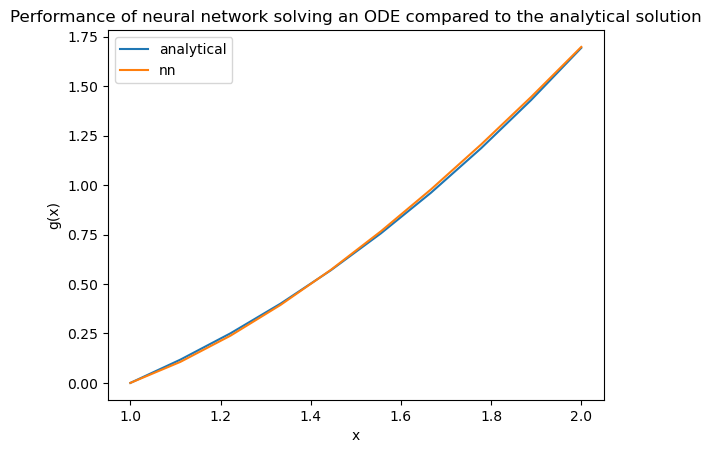

In [ ]:
# Plot the results

plt.title('Performance of neural network solving an ODE compared to the analytical solution')
plt.plot(x, res_analytical)
plt.plot(x, res[0,:])
plt.legend(['analytical','nn'])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()
